In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.layers import Input,Activation,Add,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

In [10]:
IMAGE_SIZE = (48, 48)
BATCH_SIZE = 32
EPOCHS = 15

train_data_dir = "dataset/Age/train"

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=10
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)


Found 125 images belonging to 5 classes.


Found 125 images belonging to 5 classes.


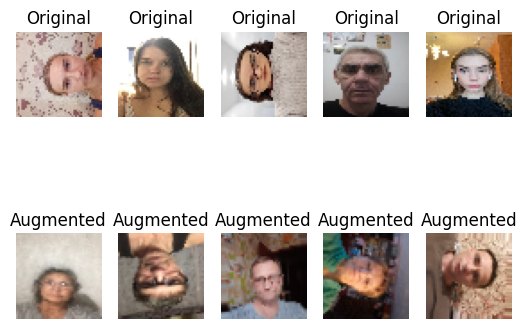

In [12]:
import matplotlib.pyplot as plt
train_datagen_no_aug = ImageDataGenerator(rescale=1./255)
train_generator_no_aug = train_datagen_no_aug.flow_from_directory(
    train_data_dir,
    target_size=IMAGE_SIZE,
    batch_size=5,
    class_mode='categorical'
)

for i in range(5):
    batch = train_generator_no_aug.next()
    image = batch[0][0]
    plt.subplot(2, 5, i + 1)
    plt.imshow(image)
    plt.axis("off")
    plt.title("Original")

for i in range(5):
    batch = train_generator.next()
    image = batch[0][0]
    plt.subplot(2, 5, i + 6)
    plt.imshow(image)
    plt.axis("off")
    plt.title("Augmented")

plt.show()

In [14]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(48, 48, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='softmax'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

with tf.device('/GPU:0'):
    model.fit(train_generator, epochs=EPOCHS)

Epoch 1/10
8/8 [==============================] - 13s 2s/step - loss: 1.6196 - accuracy: 0.1760
Epoch 2/10
8/8 [==============================] - 13s 2s/step - loss: 1.6125 - accuracy: 0.1760
Epoch 3/10
8/8 [==============================] - 13s 2s/step - loss: 1.6061 - accuracy: 0.2000
Epoch 4/10
8/8 [==============================] - 12s 1s/step - loss: 1.6055 - accuracy: 0.2480
Epoch 5/10
8/8 [==============================] - 13s 2s/step - loss: 1.5999 - accuracy: 0.2880
Epoch 6/10
8/8 [==============================] - 13s 2s/step - loss: 1.5992 - accuracy: 0.2240
Epoch 7/10
8/8 [==============================] - 13s 2s/step - loss: 1.5993 - accuracy: 0.2400
Epoch 8/10
4/8 [==============>...............] - ETA: 5s - loss: 1.5828 - accuracy: 0.3281

In [ ]:
model.save('age_detection_model2.keras')